In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.shape

(891, 15)

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


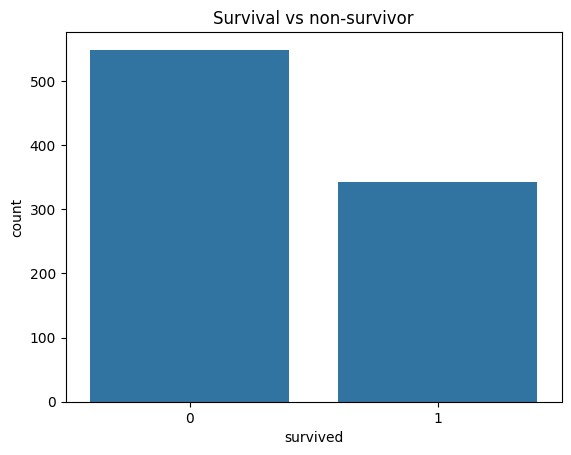

In [13]:
## Count of survivor vs non-survivor observations
sns.countplot(x='survived',data=df)
plt.title('Survival vs non-survivor')

print(df['survived'].value_counts(normalize=True)*100)

In [17]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

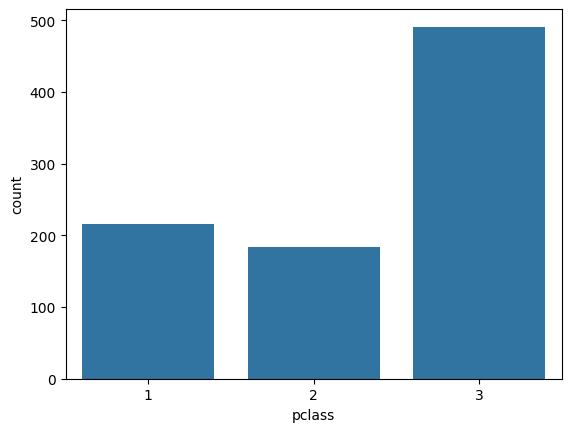

In [22]:
sns.countplot(x='pclass',data=df)
df['pclass'].value_counts(normalize=True)*100

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

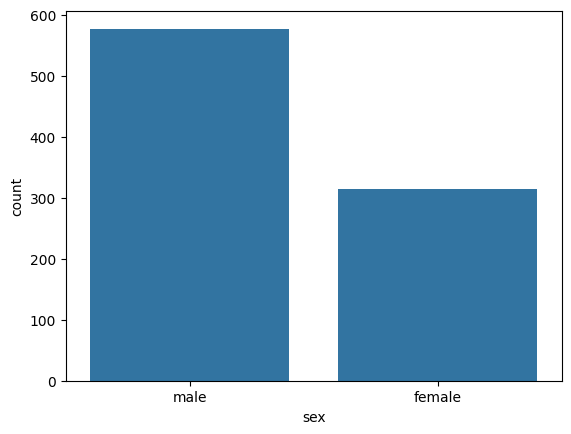

In [24]:
sns.countplot(x='sex',data=df)
df['sex'].value_counts(normalize=True)*100

<Axes: xlabel='age', ylabel='Count'>

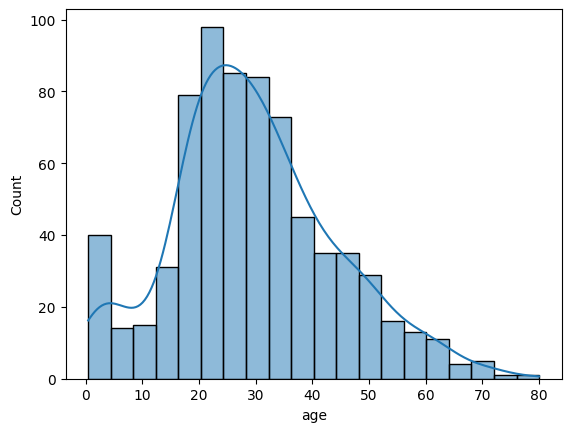

In [31]:
sns.histplot(x='age',data=df,kde=True)

## Bivariate Analysis

        survived
pclass          
1       0.629630
2       0.472826
3       0.242363


<Axes: title={'center': 'Survival by passenger class'}, xlabel='pclass', ylabel='survived'>

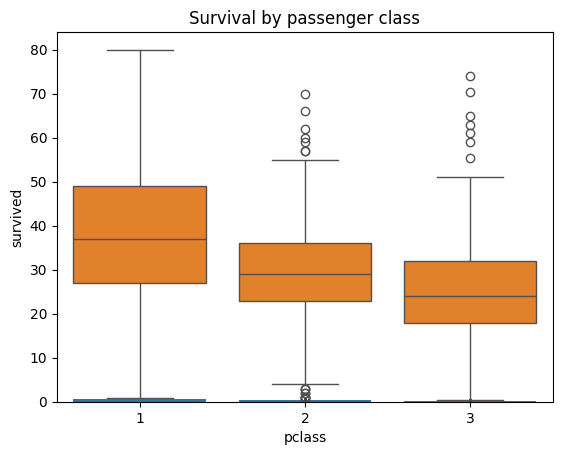

In [32]:
## Survival by passenger class

sns.barplot(x='pclass',y='survived',data=df)
plt.title('Survival by passenger class')

print(df[['pclass','survived']].groupby('pclass').mean())
sns.boxplot(x='pclass',y='age',data=df)

<Axes: xlabel='pclass', ylabel='count'>

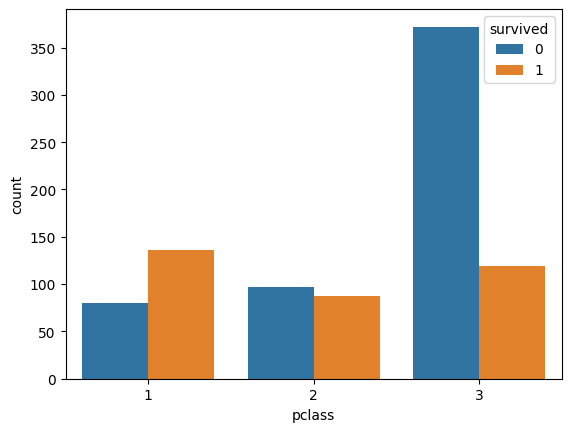

In [35]:
sns.countplot(x='pclass',hue='survived',data=df)

<Axes: xlabel='pclass', ylabel='count'>

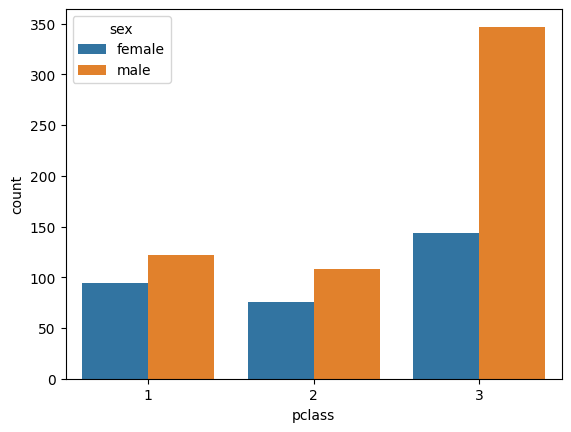

In [36]:
sns.countplot(x='pclass',hue='sex',data=df)

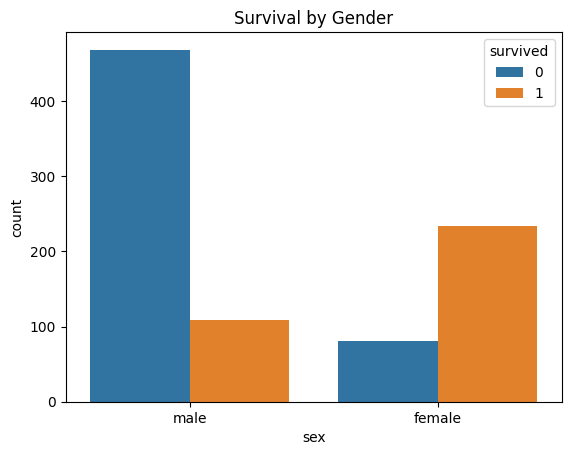

In [46]:
# Survival count by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()

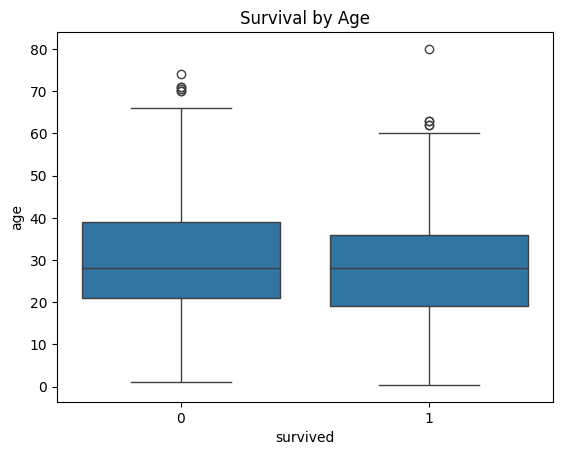

In [ ]:
sns.boxplot(x='survived', hue='age',data=df)

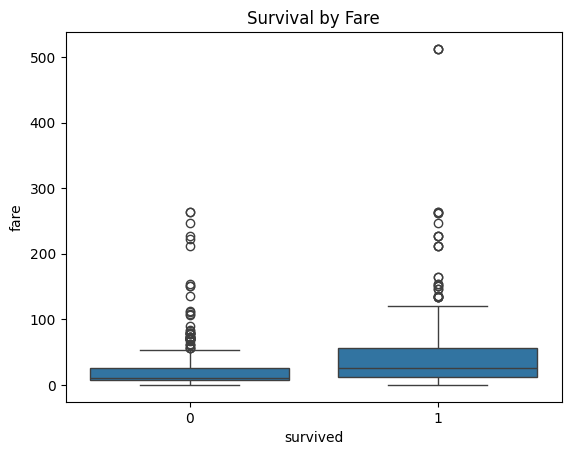

In [49]:
# Boxplot of fare by survival
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Survival by Fare')
plt.show()

## Multivariate Analysis

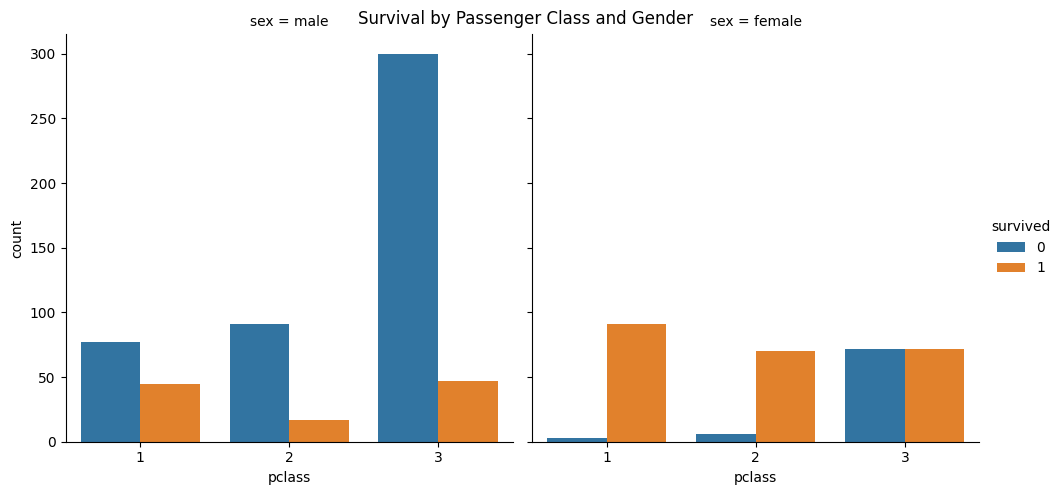

In [53]:
# Grouped bar plot
sns.catplot(x='pclass', hue='survived', col='sex', kind='count', data=df)
plt.suptitle('Survival by Passenger Class and Gender')
plt.show()

ValueError: Invalid `kind`: 'hist'. Options are 'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point'.

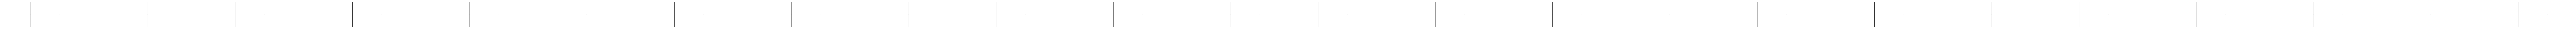

In [55]:
sns.catplot(x='pclass', hue='survived', col='age', kind='hist', data=df)

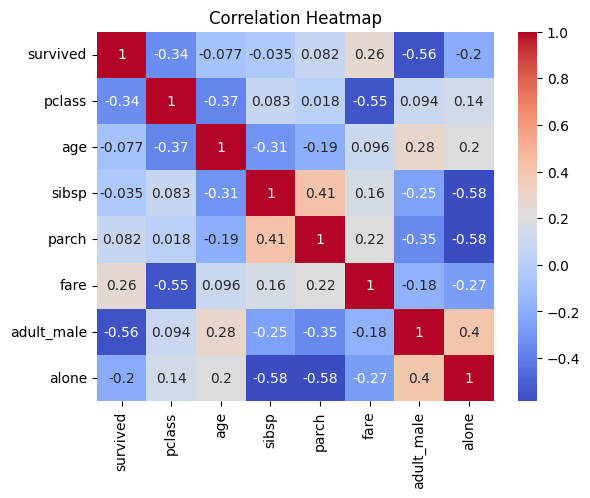

In [58]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
# Fill missing age values with the median
df['age'].fillna(df['age'].median(), inplace=True)
# Fill missing embarked values with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'deck' column as it has too many missing values
df.drop('deck', axis=1, inplace=True)

C:\Users\sanga\AppData\Local\Temp\ipykernel_2772\1534632077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\sanga\AppData\Local\Temp\ipykernel_2772\1534632077.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [61]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
